## Section 1: Imports and Configurations

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

from sklearn.preprocessing import StandardScaler

## Section 2: Load Data and Initial Inspection

In [2]:
# Load dataset
df = pd.read_csv("songs.csv", encoding="latin-1")

# Basic shape of the dataset
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

df.head()

Number of rows: 953
Number of columns: 24


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [3]:
# Display basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [4]:
# Display basic statistics
df.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


## Section 3: Missing Values and Duplicates

In [5]:
# Dispaly null counts to check for missing values in each column
missing_counts = df.isnull().sum() 
print(f"Number of null values per column: \n{missing_counts}")

Number of null values per column: 
track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64


In [6]:
# Display duplicated row counts
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


## Section 4: Select Features and Clean Data

In [7]:
# Display each column and their corresponding type
df.dtypes

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object

In [8]:
# Select numeric audio features (int64) that describe the track
numeric_audio_features = [
    "bpm",
    "danceability_%",
    "valence_%",
    "energy_%",
    "acousticness_%",
    "instrumentalness_%",
    "liveness_%",
    "speechiness_%"
]

# Metadata columns we want to keep along with the audio features
meta_cols = ["track_name", "artist(s)_name"]

# Keep metadata and audio features and drop any rows with missing values
spotify_df = df[meta_cols + numeric_audio_features].dropna().copy()
spotify_df.head()


,track_name,artist(s)_name,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",125,80,89,83,31,0,8,4
1,LALA,Myke Towers,92,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,138,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,170,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,144,65,23,80,14,63,11,6


## Section 5: Normalization

In [9]:
scaler = StandardScaler()

spotify_scaled_df = spotify_df.copy()

# Normalizae/scale the numeric audio features 
spotify_scaled_df[numeric_audio_features] = scaler.fit_transform(spotify_scaled_df[numeric_audio_features])

spotify_scaled_df.head()


,track_name,artist(s)_name,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",0.087708,0.891096,1.600828,1.131729,0.151729,-0.188132,-0.745256,-0.618829
1,LALA,Myke Towers,-1.089053,0.275624,0.407730,0.587654,-0.771972,-0.188132,-0.599314,-0.618829
2,vampire,Olivia Rodrigo,0.551280,-1.092091,-0.827979,-0.681854,-0.387097,-0.188132,0.933082,-0.416966
3,Cruel Summer,Taylor Swift,1.692382,-0.818548,0.279898,0.466749,-0.618022,-0.188132,-0.526342,0.491420
4,WHERE SHE GOES,Bad Bunny,0.765237,-0.134690,-1.211475,0.950371,-0.502559,7.307062,-0.526342,-0.416966


## Section 6: Explore Distribution of Audio Features

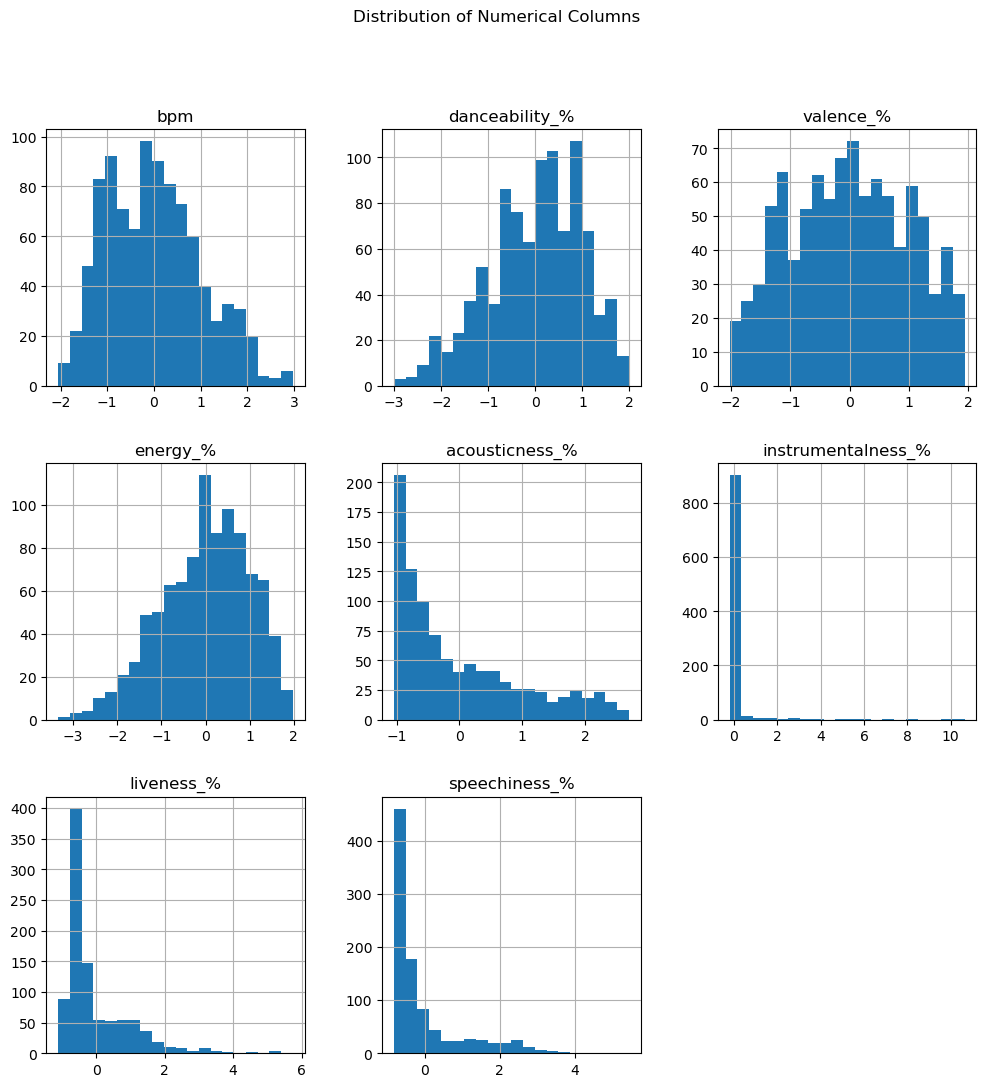

In [10]:
# Histograms showing the distribution of each numeric audio feature
spotify_scaled_df[numeric_audio_features].hist(figsize = (12,12), bins = 20)
plt.suptitle("Distribution of Numerical Columns")
plt.show()

## Section 7: Exploration of Correlation of Audio Features

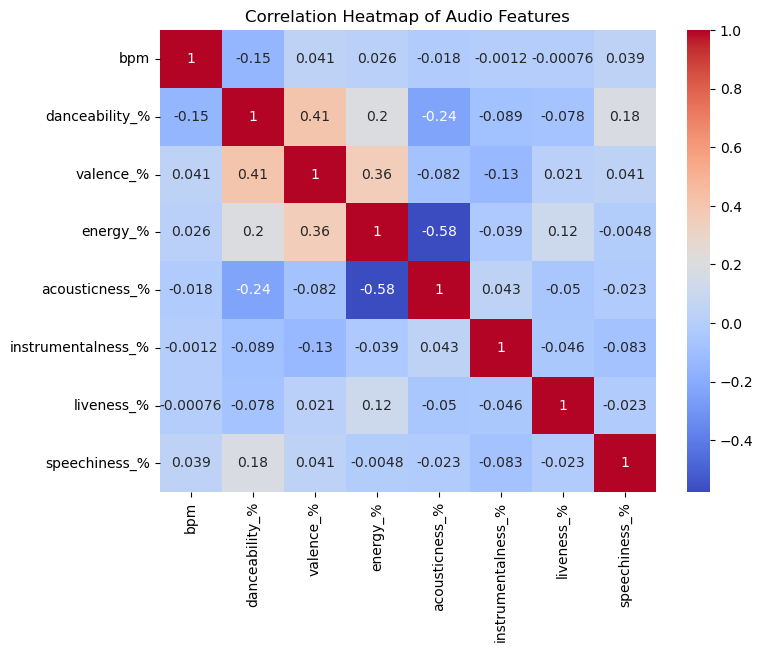

In [11]:
# Heatmap showing the correlation matrix of the audio features
corr = spotify_scaled_df[numeric_audio_features].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Audio Features")
plt.show()

In [12]:
spotify_scaled_df.to_csv("songs_cleaned.csv", index=False)